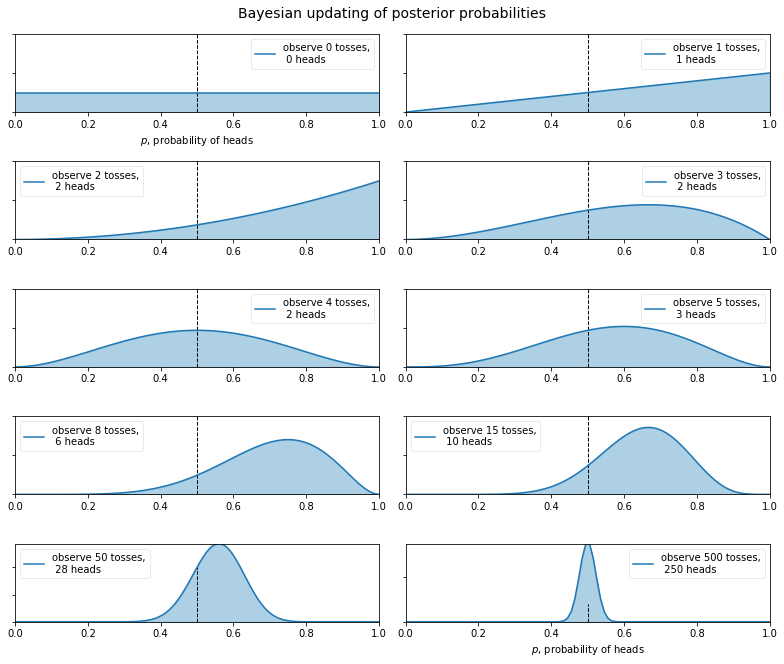

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### baysian 사후확률의 변화를 그래프화 함. 행위수를 늘려갈 수록 정규분포에 가까워짐

In [5]:
import pymc as pm
import numpy as np

count_data = np.loadtxt("./txtdata.csv")
n_count_data = len(count_data)
alpha = 1.0 / count_data.mean()  # Recall count_data is the
                               # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [3]:
print("Random output:", tau.random(), tau.random(), tau.random())

('Random output:', array(45), array(24), array(0))


In [4]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

In [5]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [6]:
some = pm.DiscreteUniform("dis",0,4)

In [18]:
### random이라는 표본을 추출한다음 observed라는 옵션을 기준으로 기존 모델을 업데이트 하느냐 안하느냐를 결정한다
data = np.array([10,5])
fixedVariable = pm.Poisson("fxd",1,value=data,observed=False)

In [19]:
fixedVariable.value

array([10,  5])

In [20]:
fixedVariable.random()

array([1, 0])

In [21]:
fixedVariable.value

array([1, 0])

## tau기준 이전 이후 변화 모델링
#### 1) exp(a) 에서 lambda1, lambda2를 랜덤으로 뽑고, 
#### 2) tau 기준 이전 이후 lambda로 삼아서 
#### 3) poi(lambda1), poi(lambda2) 를 표본 추출한다.

In [12]:

tau = pm.rdiscrete_uniform(0,80)
tau

42

In [1]:
alpha = 1./20.

In [10]:
# 지수분포에서 alpha를 남다로 삼아 랜덤 추출
##https://ko.wikipedia.org/wiki/지수분포
lambda1, lambda2 = pm.rexponential(alpha,2)
print lambda1

7.95079324833


In [16]:
lambda11 = np.r_[lambda1*np.ones(tau),lambda2*np.ones(80-tau)]
lambda11

array([ 7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.95079325,  7.95079325,  7.95079325,
        7.95079325,  7.95079325,  7.39160455,  7.39160455,  7.39160455,
        7.39160455,  7.39160455,  7.39160455,  7.39160455,  7.39160455,
        7.39160455,  7.39160455,  7.39160455,  7.39160455,  7.39160455,
        7.39160455,  7.39160455,  7.39160455,  7.39160455,  7.39160455,
        7.39160455,  7.39160455,  7.39160455,  7.39160455,  7.39160455,
        7.39160455,  7.39160455,  7.39160455,  7.39160455,  7.39

In [17]:
data = pm.rpoisson(lambda11)
data

array([ 5,  5,  8,  9, 12,  4, 11, 10, 15,  5,  6, 11,  9,  5, 13,  3,  7,
        4,  8,  7, 12,  3,  8, 14,  9, 11, 10,  6,  8,  7,  8,  8, 11,  8,
        8,  6,  8,  4, 10, 10,  5,  8,  2,  6,  3,  7,  7,  7,  4,  3,  8,
        8,  7,  9,  8,  5, 10,  3,  8,  8,  8,  7, 10, 12,  7,  6,  6,  8,
        7, 16,  4,  5,  8,  6, 11, 11,  7,  3,  5,  4])

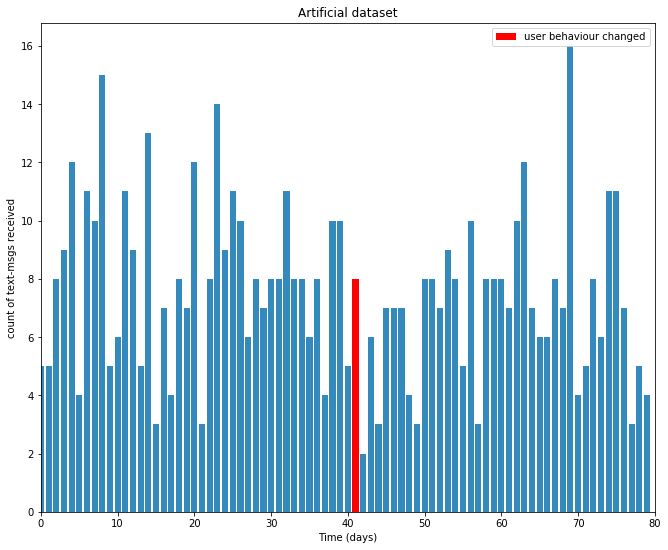

In [18]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();